# Регуляризация


## Какие методы регуляризации вы знаете?


Регуляризация — это набор методов, которые применяются для предотвращения переобучения модели, а также для улучшения её обобщающей способности. Она помогает модели избегать чрезмерной подгонки под обучающие данные и обеспечивает лучшую способность работать с новыми, невидимыми данными. Существует несколько методов регуляризации, каждый из которых имеет свои особенности и применимость.\

Основные методы регуляризации:

1. L1 регуляризация (Lasso, Least Absolute Shrinkage and Selection Operator)

Описание: L1 регуляризация добавляет штраф в виде суммы абсолютных значений весов параметров модели:

​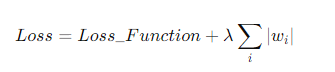

Эффект: Способствует занулению некоторых весов (coefficient sparsity). Это делает L1 регуляризацию полезной при отборе признаков, так как модель может игнорировать незначимые признаки.\
Применение: Полезна в задачах, где требуется отбор признаков, например, в линейной регрессии или логистической регрессии.

2. L2 регуляризация (Ridge)
Описание: L2 регуляризация добавляет штраф в виде суммы квадратов весов параметров модели:

​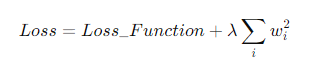
 
Эффект: Приводит к тому, что веса становятся меньше, но не зануляются. Это снижает вероятность переобучения, так как модель избегает слишком больших коэффициентов, которые могут слишком сильно подстраиваться под обучающие данные.\
Применение: Часто используется, когда необходимо уменьшить сложность модели, но сохранить все признаки.

3. Elastic Net
Описание: Elastic Net объединяет L1 и L2 регуляризации:

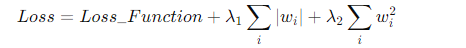​
 
Эффект: Elastic Net сочетает в себе преимущества L1 (зануление некоторых весов) и L2 (уменьшение всех весов). Это полезно, когда необходимо как отобрать признаки, так и контролировать вес других признаков.
Применение: Используется, когда модель имеет много коррелированных признаков или когда хочется получить модель с редкими весами и низким переобучением.

## Каким образом L1 обнуляет веса?

Регуляризация L1 (Lasso) обнуляет веса путем добавления суммы абсолютных значений весовых коэффициентов к функции потерь. Это приводит к тому, что некоторые веса будут установлены в ноль в процессе обучения модели.
 
Когда выполняется оптимизация функции потерь с использованием L1-регуляризации, в процессе минимизации потерь оптимизатор стремится уменьшить сумму абсолютных значений весовых коэффициентов. Поскольку это включает в себя абсолютные значения, существует возможность, что некоторые весовые коэффициенты будут равны нулю, особенно если штраф за регуляризацию (задаваемый параметром 
𝜆) достаточно большой.

# Методы оптимизации

## Что такое метод оптимизации в машинному обучении?

Методы оптимизации в машинном обучении - это алгоритмы, которые используются для настройки параметров моделей с целью минимизации функции потерь. Они определяют способ обновления параметров модели на каждом шаге обучения, направляя его к оптимальным значениям. Примеры методов оптимизации включают градиентный спуск, стохастический градиентный спуск, методы второго порядка и адаптивные методы оптимизации, такие как Adam и RMSProp.

## Какие методы сочетает в себе метод оптимизации Adam?

Оптимизатор Adam (Adaptive Moment Estimation) сочетает в себе идеи двух других методов оптимизации:

1. **Momentum** — используется для ускорения градиентного спуска за счёт сглаживания направления движения градиента, что помогает избежать колебаний и ускорить сходимость.

2. **RMSProp** — помогает адаптивно изменять скорость обучения для каждого параметра, основываясь на дисперсии градиентов. Это позволяет оптимизатору снижать шаг обучения для часто меняющихся параметров и увеличивать для тех, что изменяются медленно.

Adam объединяет идеи обоих методов:

- Используется накопление градиента с помощью Momentum для ускорения сходимости.
- Проводится адаптивная подстройка скорости обучения для каждого параметра с помощью RMSProp, уменьшая шаг для параметров с высокой вариативностью.1

# Деревья решений

## **Как строится дерево решений**

Дерево решений — это иерархическая модель, которая делит данные на подмножества на основе условий в узлах (состоящих из признаков и пороговых значений). В каждом узле принимается решение о том, как разделить данные, чтобы максимизировать различие между классами или минимизировать разброс в случае регрессии.

Процесс построения дерева решений:

1. **Выбор признака для разделения**:
   - На каждом шаге выбирается признак, по которому лучше всего разделить данные. Этот выбор основан на критерии, который измеряет качество разделения.
   - Для **классификации** обычно используются:
     - **Критерий Джини (Gini impurity)** — мера "нечистоты" узла, которая вычисляется как:

       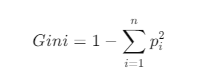\
     
     - **Энтропия** — мера неоднородности:

       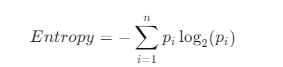\
   - Для **регрессии** может использоваться:
     - **Среднеквадратическая ошибка** или **разброс** (variance).

2. **Разделение данных**:
   - После выбора признака дерево решений выбирает пороговое значение, которое лучше всего разделяет объекты на две группы. Эти группы должны быть максимально однородными по классу (или иметь минимальный разброс для регрессии).
   
3. **Рекурсивное деление**:
   - Процесс повторяется для каждой новой ветви, пока данные не будут разделены настолько, что каждый узел содержит данные, принадлежащие одному классу (или пока не достигнут максимальной глубины дерева).
   
4. **Остановка**:
   - Деление продолжается до тех пор, пока не достигнут один из критериев остановки:
     - Все объекты в узле принадлежат одному классу.
     - Достигнута максимальная глубина дерева.
     - Количество объектов в узле меньше определённого порога (например, меньше минимального количества объектов для разделения).

Пример работы дерева:
На каждом этапе дерево решений выбирает признак и пороговое значение, которые позволяют получить наилучшее разделение данных. Затем дерево рекурсивно строится, пока не достигнет условий остановки.

---


## Что такое жадный способ построения дерева

**Жадный способ построения дерева** — это метод, при котором дерево решений строится, выбирая на каждом шаге **наилучшее разбиение** данных по критерию, который минимизирует ошибку на текущем этапе. Этот процесс повторяется для каждого узла дерева до тех пор, пока не будут выполнены условия остановки (например, дерево достигло максимальной глубины или разбиение не улучшает качество модели).

 Как работает жадный алгоритм:

1. **Выбор признака для разбиения**:
   - Для каждого признака (feature) вычисляется критерий качества разбиения, например, снижение **энтропии**, **GINI** или **дисперсии** в зависимости от типа задачи (классификация или регрессия).
   - Из всех возможных разбиений выбирается то, которое даёт наибольшее улучшение метрики (например, максимальное снижение ошибки).

2. **Рекурсивное построение**:
   - После того как было выбрано наилучшее разбиение, данные делятся на две части (для бинарного дерева), и процесс повторяется отдельно для каждой части (поддерева).
   - В каждом узле выбирается новый лучший признак и лучшее разбиение по этому признаку, исходя из подмножества данных, попавшего в этот узел.

3. **Остановка**:
   - Процесс продолжается до тех пор, пока не будет выполнено одно из условий остановки:
     - Дерево достигло максимальной глубины.
     - В узле осталось слишком мало данных для дальнейшего разбиения.
     - Все данные в узле принадлежат к одному классу или почти одинаковы по значению (для регрессии).

Жадный алгоритм строит дерево шаг за шагом, **не оглядываясь на глобальную оптимизацию** всей структуры дерева, а вместо этого на каждом этапе выбирает локально лучшее разбиение, стремясь минимизировать текущую ошибку.

 Примеры критериев для выбора лучшего разбиения:

1. **Для задач классификации**:
   - **Информационная выгода (Information Gain)**: измеряет уменьшение энтропии после разбиения.
   - **Индекс Джини (Gini Index)**: измеряет чистоту подмножеств после разбиения.
   
2. **Для задач регрессии**:
   - **Снижение дисперсии**: выбирается разбиение, которое минимизирует дисперсию в поддеревьях.
   - **Среднеквадратичная ошибка (MSE)**: вычисляется уменьшение ошибки предсказания после разбиения.

 Пример:

Рассмотрим задачу классификации, где нужно разделить данные на классы "0" и "1". У нас есть несколько признаков. Жадный алгоритм на каждом этапе выбирает такой признак и его пороговое значение, которые наилучшим образом разделяют данные на подмножества, где классы "0" и "1" более "чистые" (в подмножестве как можно больше элементов одного класса). Этот процесс продолжается рекурсивно для каждого нового подмножества.

Преимущества жадного подхода:
- **Простота и скорость**: Жадный алгоритм легко реализуется и быстро находит локальные оптимальные разбиения для построения дерева.
- **Локальная оптимальность**: На каждом шаге выбор разбиений делается на основе лучших возможных улучшений текущей ошибки.

 Недостатки жадного подхода:
- **Отсутствие глобальной оптимизации**: Жадный алгоритм выбирает локально лучшее разбиение, но это не гарантирует глобальной оптимальности всей структуры дерева. Иногда другие разбиения могли бы в конечном итоге привести к лучшему результату, но они не рассматриваются.
- **Переобучение**: Жадное построение может привести к созданию очень глубоких деревьев с большим количеством узлов, что может вызвать переобучение на обучающем наборе данных. Для борьбы с этим часто применяются методы регуляризации, такие как ограничение глубины дерева или минимальный размер узлов.

 Заключение:
Жадный способ построения деревьев — это эффективный, но локально оптимальный подход, который последовательно выбирает наилучшие разбиения на каждом шаге. Этот метод лежит в основе многих алгоритмов построения деревьев решений, включая модели градиентного бустинга и случайных лесов.

# Случайный лес

## Что такое случайный лес, как строится?

Случайный лес - это ансамблевый метод машинного обучения, основанный на комбинации нескольких деревьев решений. Он использует метод бэггинга (bootstrap aggregating), чтобы построить ансамбль деревьев решений.
 
Вот основные шаги построения случайного леса:

1. Выбор случайной подвыборки данных: Из обучающего набора данных случайным образом выбирается подвыборка данных с возвращением. Это означает, что одно и то же наблюдение может быть выбрано несколько раз, а другие наблюдения могут быть пропущены.

2. Построение деревьев решений: Для каждой случайной подвыборки данных строится дерево решений. При построении каждого дерева решений на каждом узле выбирается случайное подмножество признаков из всех доступных признаков. Это помогает сделать деревья более разнообразными и уменьшает корреляцию между деревьями.

3. Обучение деревьев решений: Для каждой случайной подвыборки данных строится дерево решений с использованием выбранных признаков. Каждое дерево строится до тех пор, пока не будет выполнено какое-то критерий останова (например, достигнута максимальная глубина дерева или достигнуто минимальное количество наблюдений в листе).

4. Формирование ансамбля: После построения всех деревьев решений их результаты комбинируются для получения окончательного прогноза. В задачах классификации результаты обычно усредняются или используется голосование большинства, а в задачах регрессии результаты усредняются.

## Как происходит подбор подмножества признаков для дерева случайного леса - один раз перед построением дерева или на каждом разбиении?

При построении дерева в случайном лесу подмножество признаков подбирается на каждом разбиении. Каждый узел дерева рассматривает только случайное подмножество признаков для выбора наилучшего разделения, что способствует уменьшению коррелированности деревьев в ансамбле и повышению его разнообразия.

# Градиентный бустинг

## Catboost, LightGBM, XGBoost
CatBoost, LightGBM и XGBoost — три популярные реализации градиентного бустинга, которые используют схожие принципы, но различаются в оптимизациях, производительности и особенностях работы. Рассмотрим подробнее ключевые различия между ними.
**XGBoost (Extreme Gradient Boosting)**

XGBoost — одна из самых ранних и популярных реализаций градиентного бустинга. Она добавила несколько важных улучшений к традиционному градиентному бустингу, что сделало её очень популярной в задачах соревнований по машинному обучению и в промышленном использовании.

 Особенности XGBoost:

- **Использование регуляризации**: XGBoost включает \( L1 \)- и \( L2 \)-регуляризацию для предотвращения переобучения. Это делает модель более устойчивой к шуму в данных.
- **Поддержка параллельных вычислений**: XGBoost может распараллеливать построение деревьев, ускоряя обучение.
- **Оптимизация поиска разбиений**: XGBoost использует метод предварительной сортировки признаков, что позволяет быстрее находить оптимальные разбиения для узлов деревьев.
- **Использование бустинга с использованием вторых производных**: XGBoost работает с функцией потерь не только через градиент (первую производную), но и через гессовую матрицу (вторую производную), что ускоряет сходимость.
- **Обработка пропусков в данных**: XGBoost автоматически обрабатывает пропуски в данных, предполагая оптимальное направление для пропущенных значений при разбиениях узлов.
- **Деревья с фиксированным шагом**: Каждое дерево корректирует предсказания модели с фиксированной скоростью обучения, чтобы избежать слишком резкого изменения модели.

Основной алгоритм:
XGBoost на каждом шаге минимизирует квадратичную ошибку за счёт градиентов и гессовой матрицы для корректировки весов. Благодаря регуляризации и эффективной обработке данных, он является мощным инструментом для табличных данных.

---

2. **LightGBM (Light Gradient Boosting Machine)**

LightGBM разработан Microsoft и создан для улучшения масштабируемости и скорости обучения на больших наборах данных. Он часто используется в производственных приложениях, где важны высокая скорость и низкое потребление памяти.

 Особенности LightGBM:

- **Гистограммный метод (Histogram-based approach)**: Вместо поиска точек разбиений на непрерывных признаках, LightGBM сначала бинирует данные (создаёт гистограммы), что значительно ускоряет процесс обучения. Это особенно эффективно на больших наборах данных.
- **Метод бустинга по листьям (Leaf-wise growth)**: LightGBM строит деревья, выбирая узлы, которые максимизируют прирост информации (наиболее информативные разбиения) и углубляя только наиболее полезные ветви дерева. Это позволяет более гибко адаптировать модель, но также может привести к переобучению на небольших данных.
- **Поддержка больших данных**: LightGBM разработан для работы с очень большими наборами данных и хорошо масштабируется.
- **Улучшенная поддержка категориальных признаков**: LightGBM умеет эффективно работать с категориальными признаками, бинируя их и выполняя разбиения на основе статистики.
- **Параллелизм**: LightGBM поддерживает распределённые вычисления и параллельное построение деревьев, что ускоряет обучение.

 Основной алгоритм:
LightGBM фокусируется на эффективности за счёт использования гистограммного метода и бустинга по листьям. Этот подход помогает работать быстрее и эффективнее на больших наборах данных.

---

 3. **CatBoost (Categorical Boosting)**

CatBoost был разработан компанией Яндекс и специально оптимизирован для работы с категориальными признаками, что делает его очень полезным для задач с табличными данными, где категориальные признаки играют важную роль. Это отличает его от других реализаций, которые требуют предварительного кодирования категорий в числовые значения.

 Особенности CatBoost:

- **Автоматическая обработка категориальных признаков**: CatBoost автоматически и эффективно кодирует категориальные признаки, используя метод **сглаживания целевых значений** (target encoding) и динамическое кодирование, чтобы предотвратить утечки информации (overfitting). Это позволяет избежать необходимости в one-hot encoding или label encoding.
- **Без градиентного смещения (Gradient Bias-Free)**: В классическом градиентном бустинге могут возникать смещения градиентов на первых шагах обучения, особенно при маленьком размере данных. CatBoost решает эту проблему с помощью особой процедуры вычисления градиентов, что улучшает сходимость.
- **Обучение с перемешиванием (Ordered boosting)**: CatBoost использует уникальный метод, который строит модели на основе порядковых разбиений (Ordered Target Statistics), предотвращая утечки информации при обучении на категориальных признаках.
- **Высокая производительность и распараллеливание**: CatBoost также поддерживает параллельное обучение и хорошо масштабируется на больших данных.
- **Стабильность на малых данных**: Благодаря особенностям работы с категориальными признаками и ordered boosting, CatBoost менее подвержен переобучению на небольших выборках по сравнению с XGBoost и LightGBM.

 Основной алгоритм:
CatBoost работает с градиентным бустингом, как и другие реализации, но его отличительной чертой является оптимизация для категориальных признаков и предотвращение смещения градиентов. Его метод Ordered Boosting помогает предотвратить утечку информации.

---

Ключевые различия между XGBoost, LightGBM и CatBoost:

| Характеристика                      | **XGBoost**                                      | **LightGBM**                                  | **CatBoost**                                       |
|--------------------------------------|-------------------------------------------------|----------------------------------------------|--------------------------------------------------|
| **Обработка категориальных признаков** | Требуется предварительное кодирование            | Требуется предварительное кодирование        | Автоматическое и эффективное кодирование          |
| **Метод построения деревьев**        | Строит деревья с фиксированной глубиной          | Бустинг по листьям (leaf-wise growth)         | Бустинг по разбиениям (ordered boosting)          |
| **Скорость обучения**                | Быстрее, чем традиционный бустинг, но медленнее, чем LightGBM | Очень быстрая за счёт гистограммного метода  | Высокая, но медленнее LightGBM                    |
| **Регуляризация**                    | \(L1\) и \(L2\)-регуляризация                    | \(L1\) и \(L2\)-регуляризация                | Регуляризация через ordered boosting               |
| **Поддержка больших данных**         | Поддерживает большие данные, но требует много памяти | Поддержка больших данных, оптимизация памяти | Хорошая производительность на средних и малых данных |
| **Устойчивость к переобучению**      | Зависит от гиперпараметров                       | Может переобучаться из-за leaf-wise роста    | Устойчив к переобучению за счёт работы с категориями |

 Когда использовать каждую библиотеку:

- **XGBoost**: Подходит для задач с табличными данными, где важно высокое качество предсказаний. Он хорошо справляется с задачами регрессии и классификации, особенно если данные уже обработаны (например, категориальные признаки закодированы).

- **LightGBM**: Идеален для задач с большими данными и ограничениями по времени или памяти. Он быстрее, чем XGBoost, благодаря гистограммному методу и эффективной работе с большими объёмами данных.

- **CatBoost**: Отличный выбор для задач с большим количеством категориальных признаков, где важно автоматическое их кодирование и защита от переобучения. Он также хорошо работает на малых и средних данных, обеспечивая высокую точность.

Таким образом, выбор между этими библиотеками зависит от ваших данных (особенно наличия категориальных признаков), требований к скорости и точности, а также ограничений по ресурсам.

---

## Почему бустинг чаще используется, чем случайный лес

Градиентный бустинг чаще используется в задачах машинного обучения, чем случайный лес, по ряду причин, связанных с его более высокой гибкостью и способностью показывать лучшие результаты на сложных задачах. Вот несколько ключевых моментов:

1. **Модель с меньшим смещением**: Градиентный бустинг работает по принципу последовательного обучения, добавляя новые деревья, которые исправляют ошибки предыдущих деревьев. Это позволяет модели лучше подстраиваться под данные и уменьшать смещение. Случайный лес строит деревья параллельно, а не последовательно, что часто приводит к модели с большим смещением.

2. **Гибкость и точность**: Градиентный бустинг позволяет лучше улавливать сложные зависимости в данных и может достигать более высокой точности на задачах с сложными нелинейными зависимостями, чем случайный лес. Он более гибок при работе с гетерогенными данными, включая задачи с высокой дисперсией.

3. **Устойчивость к шуму**: Хотя градиентный бустинг более склонен к переобучению (особенно на небольших или шумных наборах данных), современные реализации, такие как XGBoost, LightGBM и CatBoost, включают регуляризацию и механизмы для борьбы с переобучением (например, ограничение глубины деревьев, штраф за сложность модели), что делает его мощным и устойчивым к шуму.

4. **Более быстрая сходимость**: В задачах с большими данными градиентный бустинг может быстрее достигать оптимальной модели благодаря постепенному уменьшению ошибки на каждом шаге обучения. Случайный лес использует усреднение прогнозов деревьев, что помогает ему избежать переобучения, но при этом модель может оставаться менее точной в отдельных случаях.

5. **Обработка категориальных данных**: Современные реализации градиентного бустинга (например, CatBoost) могут лучше справляться с категориальными признаками без необходимости их предварительного кодирования (например, one-hot encoding), что упрощает предобработку данных и ускоряет процесс обучения.

6. **Контроль над параметрами**: Градиентный бустинг предоставляет больше возможностей для настройки и контроля над моделью, включая параметры регуляризации, скорость обучения и раннюю остановку. Это позволяет тонко настраивать модель для улучшения производительности. Случайный лес предоставляет меньше возможностей для тонкой настройки.

Однако случайный лес все же используется в задачах, где важна скорость обучения и интерпретируемость, а также в случаях, когда модель не должна быть слишком подвержена переобучению.

# Переобучение и недобучение

## Что такое переобучение как его обнаруживать и как с ним бороться?

**Переобучение** (overfitting) возникает, когда модель слишком хорошо подстраивается под данные обучения и теряет способность обобщать на новые, невиданные данные. Это приводит к высокой точности на обучающих данных, но к плохим результатам на тестовых данных. Существует несколько методов для контроля переобучения модели, в зависимости от типа модели и данных.

Методы контроля переобучения:

 1. **Регуляризация**
   Регуляризация добавляет штрафные члены к функции потерь для предотвращения слишком больших значений весов модели.
   - **L1-регуляризация (Lasso)**: уменьшает значения весов и делает их разреженными, зануляя часть весов. Полезно для отбора признаков.
   - **L2-регуляризация (Ridge)**: уменьшает значения весов, не зануляя их, и предотвращает слишком сильные зависимости от отдельных признаков.
   - **Elastic Net**: сочетает в себе L1 и L2 регуляризации для комбинирования их преимуществ.

 2. **Сокращение сложности модели**
   - **Ограничение глубины деревьев решений** (например, в методах случайного леса или градиентного бустинга): глубина дерева прямо влияет на его способность подстраиваться под данные, поэтому ограничение глубины помогает избежать слишком точного подстраивания под обучающую выборку.
   - **Ограничение количества признаков**: уменьшение количества признаков для использования в модели снижает вероятность того, что модель будет подстраиваться под шум в данных.

 3. **Раннее остановка (Early Stopping)**
   Используется в процессе обучения, особенно для нейронных сетей и градиентного бустинга. Идея в том, чтобы остановить обучение, когда модель начинает ухудшаться на проверочной выборке:
   - После каждой эпохи обучения (или итерации) проверяется ошибка на валидационной выборке.
   - Если ошибка на валидации начинает увеличиваться (а ошибка на обучающей выборке продолжает уменьшаться), обучение останавливается.

 4. **Кросс-валидация**
   Кросс-валидация помогает обнаружить переобучение на этапе обучения модели. Один из самых распространенных методов — **k-fold кросс-валидация**:
   - Данные делятся на \( k \) подвыборок (folds).
   - Модель обучается на \( k-1 \) подвыборках и тестируется на оставшейся подвыборке.
   - Этот процесс повторяется \( k \) раз, и средний результат используется для оценки обобщающей способности модели.
   - Это помогает избежать ситуации, когда модель слишком хорошо запоминает определенную часть данных.

 5. **Аугментация данных (Data Augmentation)**
   В случае, когда количество данных недостаточно для обучения, можно использовать методы аугментации данных (в основном для задач компьютерного зрения или работы с текстом):
   - Для изображений можно применять такие трансформации, как вращение, масштабирование, отражение и добавление шума.
   - Для текстов можно использовать синонимы, изменять структуру предложений и т.д.

 6. **Добавление шума**
   В некоторые модели, например нейронные сети, можно вносить случайные помехи в процесс обучения:
   - **Dropout**: нейронные сети могут использовать dropout, который на каждой итерации случайным образом "выключает" некоторые нейроны (обычно около 20-50%). Это предотвращает сеть от слишком сильного подстраивания под конкретные веса.
   - **Batch Normalization**: нормализация входов на каждом слое может помочь уменьшить переобучение, стабилизируя процесс обучения и улучшая обобщающую способность модели.

 7. **Увеличение объема данных (Data Expansion)**
   Если объем данных небольшой, модель может легко переобучиться, особенно если она сложная. Увеличение объема данных — один из самых эффективных способов борьбы с переобучением:
   - Можно использовать новые источники данных, если это возможно.
   - При работе с временными рядами можно использовать данные за более длительный промежуток времени.

 8. **Снижение размерности данных**
   Методы снижения размерности могут помочь избавиться от лишних признаков, которые добавляют шум в модель и способствуют переобучению:
   - **Principal Component Analysis (PCA)**: уменьшает количество признаков, используя линейную комбинацию исходных признаков.
   - **t-SNE** или **UMAP**: используются для снижения размерности данных и визуализации высокоразмерных данных.

 9. **Бэггинг (Bagging) и Случайные Леса**
   Бэггинг — это метод ансамблирования, который уменьшает переобучение за счет того, что создает несколько моделей на различных подвыборках данных и усредняет их предсказания. Метод случайных лесов (Random Forest) строит много деревьев решений на различных подвыборках данных и усредняет их результаты, что предотвращает переобучение.

 10. **Изменение сложности модели**
   - Для простых моделей, таких как линейная регрессия, можно использовать дополнительные признаки или полиномиальные признаки, чтобы повысить их способность обучаться.
   - Для сложных моделей, таких как глубокие нейронные сети или деревья решений, наоборот, можно уменьшить количество параметров, чтобы избежать слишком точного подстраивания под обучающие данные.

**Признаки переобучения:**
1. **Низкая ошибка на обучающей выборке** и **высокая ошибка на тестовой**.
2. **Большая разница в ошибке** между обучающей и тестовой выборками.
3. Визуализация **переобучения**: когда модель слишком хорошо подстраивается под конкретные точки данных на графике.

 Вывод:
Переобучение — это распространенная проблема в машинном обучении, особенно при работе с комплексными моделями и небольшими объемами данных. Для его контроля можно использовать различные методы, такие как регуляризация, увеличение данных, ранняя остановка и кросс-валидация.

## Что такое недообучение и как с ним бороться?

**Недообучение модели (underfitting)** — это ситуация, когда модель недостаточно хорошо описывает зависимости в данных, что приводит к плохим результатам как на обучающем наборе данных, так и на тестовом наборе. Проще говоря, модель слишком простая для того, чтобы уловить сложные закономерности в данных.

Причины недообучения:
1. **Модель слишком простая**: Используется слишком простая модель, которая не имеет достаточной мощности для того, чтобы уловить сложные зависимости в данных (например, линейная модель для нелинейной задачи).
2. **Недостаточное количество признаков**: Модель не имеет достаточного количества информативных признаков, что ограничивает её возможности.
3. **Слишком сильная регуляризация**: Использование чрезмерной регуляризации (например, очень большое значение \(\lambda\) в L2 или L1 регуляризации) может "наказать" модель, делая её слишком простой.
4. **Недостаточное количество данных для обучения**: Модель может не иметь достаточно данных для того, чтобы "научиться" распознавать сложные паттерны в них.
5. **Недостаточное количество эпох обучения**: В случае нейронных сетей обучение может быть остановлено слишком рано, до того, как модель успела полностью обучиться.

 Признаки недообучения:
- Низкая точность как на обучающем, так и на тестовом наборе данных.
- Высокие значения ошибки на обоих наборах данных.
- Модель плохо предсказывает даже на тех данных, на которых обучалась.

 Как бороться с недообучением:
1. **Использовать более сложную модель**: Попробовать более сложные модели, которые могут лучше уловить зависимости в данных (например, использовать нелинейные модели, более глубокие нейронные сети, градиентный бустинг).
2. **Добавить больше признаков**: Создать или использовать больше информативных признаков (feature engineering), которые помогут модели лучше описывать зависимости в данных.
3. **Увеличить количество данных**: Собрать или сгенерировать больше данных для обучения. Это может помочь модели лучше обобщать зависимости.
4. **Уменьшить регуляризацию**: Если используется регуляризация, попробуйте уменьшить её силу (снизить коэффициент \(\lambda\) для L1/L2 регуляризации). Это даст модели больше возможностей для обучения.
5. **Увеличить количество эпох обучения**: В случае нейронных сетей увеличьте количество эпох или шагов обучения, чтобы дать модели возможность обучиться более полно.
6. **Использовать более сложные алгоритмы**: Попробуйте использовать такие методы, как:
   - Градиентный бустинг (CatBoost, LightGBM, XGBoost).
   - Сложные ансамбли моделей.
   - Сложные архитектуры нейронных сетей (например, сверточные нейронные сети для изображений, рекуррентные сети для последовательностей).
7. **Улучшить архитектуру модели**: Если используется нейронная сеть, можно добавить больше слоёв или нейронов для улучшения её способности обучаться.
   
 Пример:

В случае линейной регрессии для данных с нелинейными зависимостями модель будет иметь высокую ошибку, так как линия не может адекватно описать сложную структуру данных. В этом случае можно использовать полиномиальную регрессию или добавить нелинейные признаки.

 Вывод:
Недообучение происходит, когда модель слишком проста для того, чтобы улавливать закономерности в данных. Борьба с недообучением заключается в том, чтобы усложнить модель, улучшить её архитектуру, добавить больше признаков, данных или настроить гиперпараметры, такие как сила регуляризации или количество эпох обучения.

# Bias-variance decomposition


**Bias-Variance Decomposition** (разложение смещения и разброса) — это важная концепция в машинном обучении, которая помогает понять ошибки моделей и причины, по которым они могут быть недообученными (underfitting) или переобученными (overfitting).

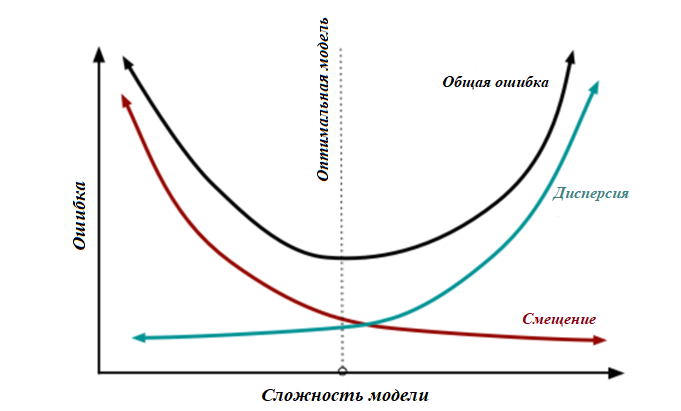

 Основные составляющие:

1. **Bias (смещение)**: Это ошибка, возникающая из-за слишком сильных упрощений, которые модель делает о данных.
   - **Высокое смещение** означает, что модель делает грубые предположения и не улавливает сложные закономерности в данных.
   - **Низкое смещение** означает, что модель хорошо аппроксимирует истинные зависимости в данных.

2. **Variance (разброс)**: Это мера чувствительности модели к малым изменениям в обучающих данных.
   - **Высокий разброс** означает, что модель очень подстраивается под конкретные данные, запоминает их и может плохо обобщать на новые данные.
   - **Низкий разброс** означает, что модель не слишком чувствительна к малым изменениям в обучающих данных и обобщает хорошо.

3. **Irreducible error (неискоренимая ошибка)**: Это ошибка, связанная с шумом в данных. Она неизбежна и не может быть устранена с помощью моделей.

 Формула общей ошибки модели:
Общая ошибка модели на новых данных, которую мы стремимся минимизировать, состоит из трёх компонентов:

\[
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

- **Bias** описывает то, насколько модель в среднем отклоняется от истинных значений (ошибка из-за слишком сильного упрощения).
- **Variance** описывает, насколько сильно модель отклоняется на различных подвыборках данных (ошибка из-за переобучения).

 Баланс между смещением и разбросом:
- **Модель с высоким смещением и низким разбросом** обычно недообучена. Она делает слишком простые предположения о данных и не улавливает их сложные закономерности. Пример — линейные модели на сложных нелинейных данных.
  
- **Модель с низким смещением и высоким разбросом** обычно переобучена. Она слишком сильно подстраивается под обучающие данные, включая шум, и плохо работает на новых данных. Пример — слишком сложные модели, такие как глубокие нейронные сети с недостаточным объемом данных.

 Пример:

Представьте, что вам нужно построить модель для предсказания цены дома. Если вы выберете слишком простую модель (например, линейную регрессию), она будет иметь **высокое смещение** и не сможет уловить более сложные зависимости (например, нелинейные эффекты расположения дома). Если вы выберете слишком сложную модель (например, глубокую нейронную сеть) и обучите её на небольшом объеме данных, она может **переобучиться**, то есть иметь **высокий разброс**, подстроившись под шум и особенности конкретного набора данных.

 Проблема:
- **Underfitting (недообучение)** — высокая ошибка из-за **высокого смещения**. Модель слишком упрощена и не отражает зависимости в данных.
- **Overfitting (переобучение)** — высокая ошибка из-за **высокого разброса**. Модель слишком детально повторяет данные, включая шум, и не обобщает информацию.

 Как находить баланс?
Главная цель в машинном обучении — найти баланс между смещением и разбросом. Это делается за счёт:
- Выбора правильной модели (не слишком сложной и не слишком простой).
- Регуляризации (например, L1, L2), чтобы снизить разброс, не увеличивая смещение.
- Использования методов кросс-валидации для нахождения оптимальных гиперпараметров.

Баланс между смещением и разбросом очень важен для создания моделей, которые могут хорошо обобщать информацию на новых данных.